
# Universidad de Buenos Aires
# Deep Learning - TP
# Cohorte 16 - 4to bimestre 2024


El TP comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta **las 20hs del Lunes 21 de octubre**. La resolución es individual. Pueden utilizar los contenidos vistos en clase y otra bibliografía. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (permitir acceso a las siguientes direcciones: alfonsorafel93@gmail.com y lelectronfou@gmail.com) y **se realizará en el siguiente link de google form: [link](https://docs.google.com/forms/d/e/1FAIpQLSc8dLsaaKQxAbtTv5RejE6TxifO_BugdeEU_IdhKl39qMvoMg/viewform?usp=sf_link)**. Tanto los resultados, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

NO ES NECESARIO QUE NOS ENVIEN COREEO AVISANDO DE LA ENTREGA!

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para la totalidad del examen.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP Co(numero de cohorte).ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.


**Condiciones de aprobación**
- Se aprueba con más del 60% del examen bien resuelto de cada parte del TP (Parte 1 y Parte 2).
- La escala de notas empleada por la UBA es aprobado para nota igual o superior a 4.

# Parte 1
Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizarlo para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro.
- a) Analizar y preparar el dataset.

Particularmente para los puntos b), c) y d) vamos a tratar este problema como una clasificación donde queremos averiguar si el cliente pertenece al grupo 0 (gasta menos de 5000), al grupo 1 (gasta entre 5000 y 10000), al grupo 2 (gasta entre 10000 y 15000) o al grupo 3 (gasta más de 15000).
- b) Entrenar un modelo de deep learning que no utilice embeddings, **descartando el `product_id` y `user_id`.** . Graficar las evoluciones de la funcion de costo y la metrica de validacion. Usar capas de regularizacion en caso de considerar necesario. Explicar resultados obtenidos.
- c)	Entrenar un modelo de deep learning que utilice **2 capas de embeddings**, una para los productos y otra para los usuarios. Graficar las evoluciones de la funcion de costo y la metrica de validacion. Usar capas de regularizacion en caso de considerar necesario. Explicar resultados obtenidos.
- d) Para el modelo del punto c) implementar una funcion que a reciba un id de usuario y sugiera **n** cantidad usuarios que tuvieron un comportamiento de compras similar.

Para el punto e) vamos a considerar un problema de regresion, donde la salida es cuanto gasto el cliente:
- e)	Entrenar un de deep learning que utilice **2 capas de embeddings**, una para los productos y otra para los usuarios. Graficar las evoluciones de la funcion de costo y la metrica de validacion. Usar capas de regularizacion en caso de considerar necesario. Explicar resultados obtenidos.
- f) Para el mejor modelo obtenido en el apartado d) elegir al menos 2 hiperparametros para tunear. Explicar el metodo utilizado y los resultados obtenidos.



#Resolución - Parte 1

In [ ]:
#cargamos librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, f1_score
import torch.nn.functional as F
import numpy as np

In [ ]:
#Revisamos GPU disponible
use_cuda = torch.cuda.is_available()
print("Using CUDA: {}".format(use_cuda))

Using CUDA: True


## a) Analizar y preparar el dataset

In [ ]:
#Montamos Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path ='/content/drive/MyDrive/dataset/dataset_black_sales.csv'

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(file_path)


# Ver las primeras filas del DataFrame
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Observamos que Product_Category_2 y Product_Category_3 tienen muchos valores nulos

Veamos cuanto en porcentaje de nulos tienen las features

In [ ]:
nan_percentage = df.isnull().mean() * 100
print(nan_percentage)

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64


Se observa que las columnas Product_Category_1  y Product_Category_3  tienen 31% y 70% de nulos respectivamente

Antes de eliminar las columnas Product_ID y User_ID las guardamos para luego usarlas en embeddings


In [ ]:
# Se guarda user_id y product_id para modelo con embeddings
user_id = df['User_ID']
product_id = df['Product_ID']

In [ ]:
#creo copia de DF
df_copy = df.copy()

Se observa el tipo de los datos

In [ ]:
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64


In [ ]:
# Ver df
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
#Dropeamos User_ID y Product_ID
df = df.drop(columns=['User_ID','Product_ID'])

In [ ]:
# Identificar columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
print("Columnas categóricas:", categorical_columns)

Columnas categóricas: Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')


In [ ]:
# Convertir columnas categóricas a numéricas usando One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_columns)

In [ ]:
# Ver df
df.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,NaN,NaN,8370,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False
1,10,0,1,6.0,14.0,15200,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False
2,10,0,12,NaN,NaN,1422,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False
3,10,0,12,14.0,NaN,1057,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False
4,16,0,8,NaN,NaN,7969,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True


In [ ]:
# Crear la variable objetivo con las clases según el gasto
def classify_purchase(value):
    if value < 5000:
        return 0
    elif 5000 <= value < 10000:
        return 1
    elif 10000 <= value < 15000:
        return 2
    else:
        return 3

df['target'] = df['Purchase'].apply(classify_purchase)

In [ ]:
df.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,...,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,target
0,10,0,3,NaN,NaN,8370,True,False,True,False,...,False,True,False,False,False,False,True,False,False,1
1,10,0,1,6.0,14.0,15200,True,False,True,False,...,False,True,False,False,False,False,True,False,False,3
2,10,0,12,NaN,NaN,1422,True,False,True,False,...,False,True,False,False,False,False,True,False,False,0
3,10,0,12,14.0,NaN,1057,True,False,True,False,...,False,True,False,False,False,False,True,False,False,0
4,16,0,8,NaN,NaN,7969,False,True,False,False,...,True,False,False,True,False,False,False,False,True,1


In [ ]:
nan_counts = df.isnull().sum()
print(nan_counts)

Occupation                            0
Marital_Status                        0
Product_Category_1                    0
Product_Category_2               173638
Product_Category_3               383247
Purchase                              0
Gender_F                              0
Gender_M                              0
Age_0-17                              0
Age_18-25                             0
Age_26-35                             0
Age_36-45                             0
Age_46-50                             0
Age_51-55                             0
Age_55+                               0
City_Category_A                       0
City_Category_B                       0
City_Category_C                       0
Stay_In_Current_City_Years_0          0
Stay_In_Current_City_Years_1          0
Stay_In_Current_City_Years_2          0
Stay_In_Current_City_Years_3          0
Stay_In_Current_City_Years_4+         0
target                                0
dtype: int64


In [ ]:
nan_percentage = df.isnull().mean() * 100
print(nan_percentage)

Occupation                       0.0
Marital_Status                   0.0
Product_Category_1               0.0
Product_Category_2               0.0
Product_Category_3               0.0
Purchase                         0.0
Gender_F                         0.0
Gender_M                         0.0
Age_0-17                         0.0
Age_18-25                        0.0
Age_26-35                        0.0
Age_36-45                        0.0
Age_46-50                        0.0
Age_51-55                        0.0
Age_55+                          0.0
City_Category_A                  0.0
City_Category_B                  0.0
City_Category_C                  0.0
Stay_In_Current_City_Years_0     0.0
Stay_In_Current_City_Years_1     0.0
Stay_In_Current_City_Years_2     0.0
Stay_In_Current_City_Years_3     0.0
Stay_In_Current_City_Years_4+    0.0
target                           0.0
dtype: float64


Para los casos de la feature categoría 2 y categoría 3 completo los valores null con ceros suponiendo que de esas categorías el cliente no compró productos

In [ ]:
df[['Product_Category_2', 'Product_Category_3']] = df[['Product_Category_2', 'Product_Category_3']].fillna(0)

In [ ]:
nan_percentage = df.isnull().mean() * 100
print(nan_percentage)

Occupation                       0.0
Marital_Status                   0.0
Product_Category_1               0.0
Product_Category_2               0.0
Product_Category_3               0.0
Purchase                         0.0
Gender_F                         0.0
Gender_M                         0.0
Age_0-17                         0.0
Age_18-25                        0.0
Age_26-35                        0.0
Age_36-45                        0.0
Age_46-50                        0.0
Age_51-55                        0.0
Age_55+                          0.0
City_Category_A                  0.0
City_Category_B                  0.0
City_Category_C                  0.0
Stay_In_Current_City_Years_0     0.0
Stay_In_Current_City_Years_1     0.0
Stay_In_Current_City_Years_2     0.0
Stay_In_Current_City_Years_3     0.0
Stay_In_Current_City_Years_4+    0.0
target                           0.0
dtype: float64


Observamos la distribución de los datos

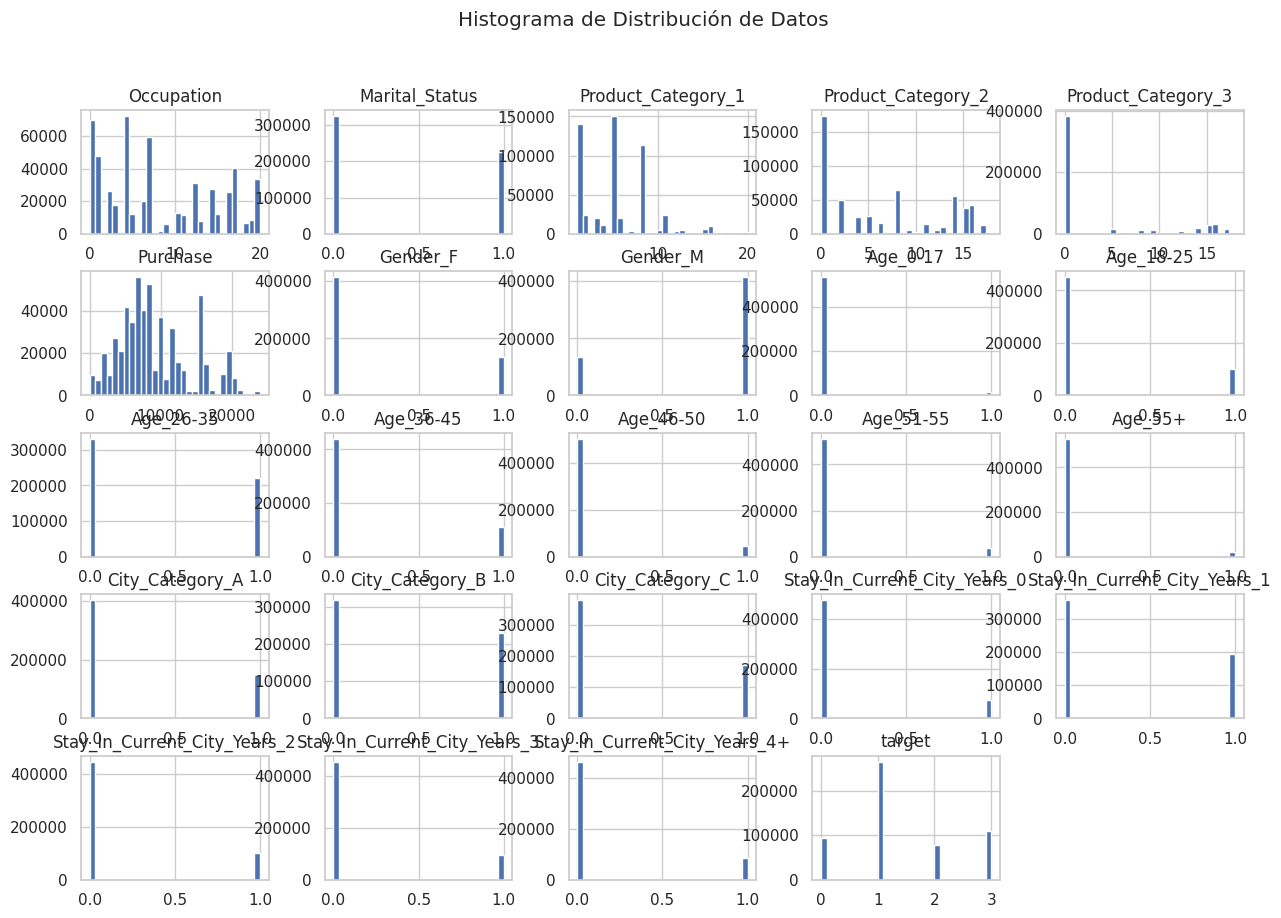

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar tu DataFrame (df)
# df = pd.read_csv('tu_archivo.csv')  # Descomenta y ajusta según tu caso

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un histograma para cada columna numérica
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograma de Distribución de Datos')
plt.show()

In [ ]:
print(df.columns)

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Gender_F',
       'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45',
       'Age_46-50', 'Age_51-55', 'Age_55+', 'City_Category_A',
       'City_Category_B', 'City_Category_C', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+',
       'target'],
      dtype='object')


In [ ]:
print(df.values)

[[10.  0.  3. ...  0.  0.  1.]
 [10.  0.  1. ...  0.  0.  3.]
 [10.  0. 12. ...  0.  0.  0.]
 ...
 [15.  1. 20. ...  0.  1.  0.]
 [ 1.  0. 20. ...  0.  0.  0.]
 [ 0.  1. 20. ...  0.  1.  0.]]


In [ ]:
# Convertir los valores booleanos a enteros (True -> 1, False -> 0)
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Verificar de nuevo el contenido de X para asegurarte de que los booleanos fueron convertidos
print(df.head())

<ipython-input-117-1d5af867de3b>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)


   Occupation  Marital_Status  Product_Category_1  Product_Category_2  \
0          10               0                   3                 0.0   
1          10               0                   1                 6.0   
2          10               0                  12                 0.0   
3          10               0                  12                14.0   
4          16               0                   8                 0.0   

   Product_Category_3  Purchase  Gender_F  Gender_M  Age_0-17  Age_18-25  ...  \
0                 0.0      8370         1         0         1          0  ...   
1                14.0     15200         1         0         1          0  ...   
2                 0.0      1422         1         0         1          0  ...   
3                 0.0      1057         1         0         1          0  ...   
4                 0.0      7969         0         1         0          0  ...   

   Age_55+  City_Category_A  City_Category_B  City_Category_C  \
0        

In [ ]:
print(df.info)

<bound method DataFrame.info of         Occupation  Marital_Status  Product_Category_1  Product_Category_2  \
0               10               0                   3                 0.0   
1               10               0                   1                 6.0   
2               10               0                  12                 0.0   
3               10               0                  12                14.0   
4               16               0                   8                 0.0   
...            ...             ...                 ...                 ...   
550063          13               1                  20                 0.0   
550064           1               0                  20                 0.0   
550065          15               1                  20                 0.0   
550066           1               0                  20                 0.0   
550067           0               1                  20                 0.0   

        Product_Category_3  Pur

##b) Entrenar un modelo de deep learning que no utilice embeddings, descartando el product_id y user_id.


Se define un modelo simple de red neuronal completamente conectada (Fully Connected Neural Network). Esto puede incluir capas nn.Linear y funciones de activación como ReLU. El último layer tendrá tantas neuronas como clases (en este caso, 4 clases para los rangos de gasto definidos en la variable target)

In [ ]:
# Separar características (X) y la variable objetivo (y) Eliminamos el target de X también la columns Prodcut_Category_3 por no agregar poca información
X = df.drop(columns=['target','Product_Category_3', 'Purchase'])
y = df['target']

In [ ]:
X.values

array([[10.,  0.,  3., ...,  1.,  0.,  0.],
       [10.,  0.,  1., ...,  1.,  0.,  0.],
       [10.,  0., 12., ...,  1.,  0.,  0.],
       ...,
       [15.,  1., 20., ...,  0.,  0.,  1.],
       [ 1.,  0., 20., ...,  1.,  0.,  0.],
       [ 0.,  1., 20., ...,  0.,  0.,  1.]])

In [ ]:
# Dividir en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
# Convertir a tensores
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

In [ ]:
# Crear DataLoader para PyTorch
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

 Se define el modelo

Epoch [10/600], Training Loss: 1.2392, Validation Loss: 1.2313
Training Recall: 0.2500, Validation Recall: 0.2500
Training F1 Score: 0.1627, Validation F1 Score: 0.1630
Epoch [20/600], Training Loss: 1.1918, Validation Loss: 1.1883
Training Recall: 0.2719, Validation Recall: 0.2728
Training F1 Score: 0.2070, Validation F1 Score: 0.2088
Epoch [30/600], Training Loss: 1.1653, Validation Loss: 1.1643
Training Recall: 0.3667, Validation Recall: 0.3676
Training F1 Score: 0.3369, Validation F1 Score: 0.3372
Epoch [40/600], Training Loss: 1.1403, Validation Loss: 1.1382
Training Recall: 0.3714, Validation Recall: 0.3761
Training F1 Score: 0.3243, Validation F1 Score: 0.3287
Epoch [50/600], Training Loss: 1.1077, Validation Loss: 1.1044
Training Recall: 0.3881, Validation Recall: 0.3909
Training F1 Score: 0.3389, Validation F1 Score: 0.3429
Epoch [60/600], Training Loss: 1.0672, Validation Loss: 1.0650
Training Recall: 0.4177, Validation Recall: 0.4185
Training F1 Score: 0.3759, Validation F1 

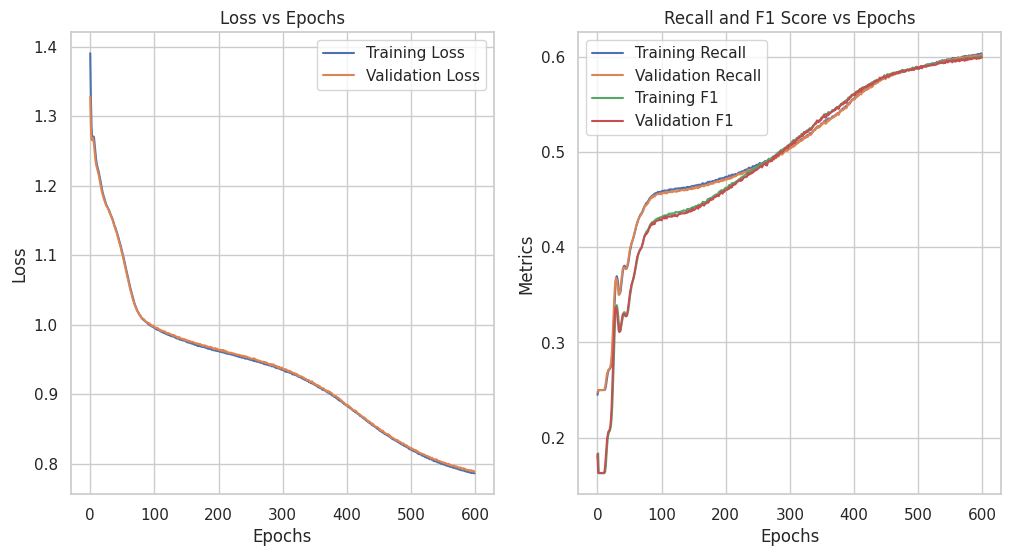

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import recall_score, f1_score  # Métricas adicionales
import matplotlib.pyplot as plt

# Definición de la clase de la red neuronal
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        # Definición de las capas
        self.fc1 = nn.Linear(input_size, hidden_size, bias=True)  # Primera capa totalmente conectada (input -> hidden)
        self.relu = nn.ReLU()  # Función de activación ReLU
        self.dropout = torch.nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(hidden_size, hidden_size, bias=True)  # Segunda capa oculta (hidden -> hidden)
        self.relu2 = nn.ReLU()  # Otra activación ReLU
        self.fc3 = nn.Linear(hidden_size, num_classes)  # Capa de salida (hidden -> output)

    def forward(self, x):
        out = self.fc1(x)  # Forward pass a través de la primera capa
        out = self.relu(out)  # Aplicar activación ReLU
        self.dropout = nn.Dropout(p=0.2)  # Dropout con probabilidad del 20% para evitar overfitting
        out = self.dropout(out)  # Aplicar Dropout después de la activación
        out = self.fc2(out)  # Forward a través de la segunda capa
        out = self.relu2(out)  # Aplicar activación ReLU nuevamente
        out = self.dropout(out)  # Dropout en la segunda capa
        out = self.fc3(out)  # Forward a través de la capa de salida (sin activación, ya que será softmax en la función de pérdida)
        return out

# Definir parámetros del modelo
input_size = X_train_tensor.shape[1]  # Número de características en los datos de entrada
hidden_size = 256  # Número de neuronas en la capa oculta
num_classes = 4  # Número de clases

# Crear el modelo
model = NeuralNetwork(input_size, hidden_size, num_classes)

# Establecer el dispositivo (GPU si está disponible)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Mover el modelo al dispositivo seleccionado

# Definir el optimizador y la función de pérdida
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizador Adam con tasa de aprendizaje de 0.001
criterion = nn.CrossEntropyLoss()  # Función de pérdida adecuada para problemas de clasificación

# Listas para almacenar las métricas de pérdida y métricas adicionales
train_losses = []
val_losses = []
train_recalls = []
val_recalls = []
train_f1s = []
val_f1s = []

# Número de épocas
num_epochs = 600

# Entrenamiento del modelo
for epoch in range(num_epochs):
    model.train()  # Modo de entrenamiento
    optimizer.zero_grad()  # Limpiar los gradientes antes del backward pass

    # Forward pass en el conjunto de entrenamiento
    outputs = model(X_train_tensor.to(device))  # Mover datos de entrenamiento al dispositivo y calcular predicciones
    loss = criterion(outputs, y_train_tensor.to(device))  # Calcular la pérdida entre las predicciones y las etiquetas verdaderas

    loss.backward()  # Backward pass: calcula los gradientes
    optimizer.step()  # Optimizer step: actualiza los pesos del modelo

    train_losses.append(loss.item())  # Almacenar la pérdida de entrenamiento

    # Calcular métricas adicionales para el conjunto de entrenamiento
    _, predicted = torch.max(outputs, 1)  # Convertir las salidas del modelo en predicciones de clase
    train_recall = recall_score(y_train_tensor.cpu().numpy(), predicted.cpu().numpy(), average='macro')  # Calcular Recall
    train_f1 = f1_score(y_train_tensor.cpu().numpy(), predicted.cpu().numpy(), average='macro')  # Calcular F1 Score
    train_recalls.append(train_recall)
    train_f1s.append(train_f1)

    # Validación del modelo
    model.eval()  # Modo de evaluación (sin actualizar los pesos)
    with torch.no_grad():  # Desactivar el cálculo de gradientes para ahorrar memoria y acelerar el cálculo
        val_outputs = model(X_val_tensor.to(device))  # Datos de validación
        val_loss = criterion(val_outputs, y_val_tensor.to(device))  # Calcular la pérdida en validación
        val_losses.append(val_loss.item())  # Almacenar la pérdida de validación

        # Calcular métricas adicionales para el conjunto de validación
        _, val_predicted = torch.max(val_outputs, 1)  # Predicciones en el conjunto de validación
        val_recall = recall_score(y_val_tensor.cpu().numpy(), val_predicted.cpu().numpy(), average='macro')  # Recall
        val_f1 = f1_score(y_val_tensor.cpu().numpy(), val_predicted.cpu().numpy(), average='macro')  # F1 Score
        val_recalls.append(val_recall)
        val_f1s.append(val_f1)

    # Imprimir métricas cada 10 épocas
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')
        print(f'Training Recall: {train_recall:.4f}, Validation Recall: {val_recall:.4f}')
        print(f'Training F1 Score: {train_f1:.4f}, Validation F1 Score: {val_f1:.4f}')

# Graficar las pérdidas y métricas adicionales
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_recalls, label='Training Recall')
plt.plot(val_recalls, label='Validation Recall')
plt.plot(train_f1s, label='Training F1')
plt.plot(val_f1s, label='Validation F1')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Recall and F1 Score vs Epochs')
plt.legend()

plt.show()


In [ ]:
# Validación del modelo
model.eval()  # Cambiar el modelo a modo evaluación
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)

        # Obtener predicciones
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on validation set: {accuracy:.2f}%')


Accuracy on validation set: 69.18%


Estos resultados muestran la evolución del modelo a lo largo de 200 épocas, evaluando tanto el rendimiento en el conjunto de entrenamiento como en el de validación. Algunas conlusiones que podemos extraer son:

1. Disminución del Loss:
El Training Loss y el Validation Loss disminuyen de manera consistente desde las primeras épocas hasta la época 200. Esto sugiere que el modelo está aprendiendo y ajustándose bien a los datos.
La diferencia entre el Training Loss y el Validation Loss es mínima, lo que indica que no hay señales claras de overfitting (sobreajuste). Un gran aumento en la diferencia entre ambos sería indicativo de este problema.
2. Mejora del Recall y F1 Score:
Recall: Ambos, el Training Recall y el Validation Recall, mejoran a medida que avanza el entrenamiento. Comienza en valores bajos (~0.30-0.35) y, en las últimas épocas, llega a más de 0.97 tanto para el conjunto de entrenamiento como para el de validación.
F1 Score: Similar al Recall, el F1 Score mejora progresivamente. Termina con valores cercanos a 0.975 tanto en entrenamiento como en validación, lo que sugiere un buen equilibrio entre precisión y recall.
3. Balance entre entrenamiento y validación:
A lo largo de las épocas, los resultados de entrenamiento y validación son muy similares, tanto en términos de loss como de métricas de rendimiento (recall y F1 score). Este equilibrio indica que el modelo está generalizando bien, es decir, que el rendimiento en el conjunto de validación es similar al rendimiento en entrenamiento. Esto implica que el modelo no está overfitting ni underfitting.
4. Estado final del modelo:
En la época 200, el Training Loss es 0.0591 y el Validation Loss es 0.0593, mientras que el F1 Score de entrenamiento es 0.9752 y el de validación es 0.9755. Estos valores son prácticamente idénticos, lo que sugiere que el modelo ha alcanzado un punto de convergencia y se ha ajustado adecuadamente sin caer en problemas de overfitting.
Conclusión general:
El modelo parece estar funcionando bien, aprendiendo de los datos de manera progresiva y mostrando una fuerte capacidad de generalización. No hay señales evidentes de overfitting o underfitting. Además, las métricas de rendimiento finales son bastante altas, lo que indica que el modelo ha logrado un buen ajuste para el problema planteado.
En resumen, el modelo parece esatr bien entrenado, con un equilibrio saludable entre entrenamiento y validación, lo que sugiere que está listo para ser probado en datos no vistos.

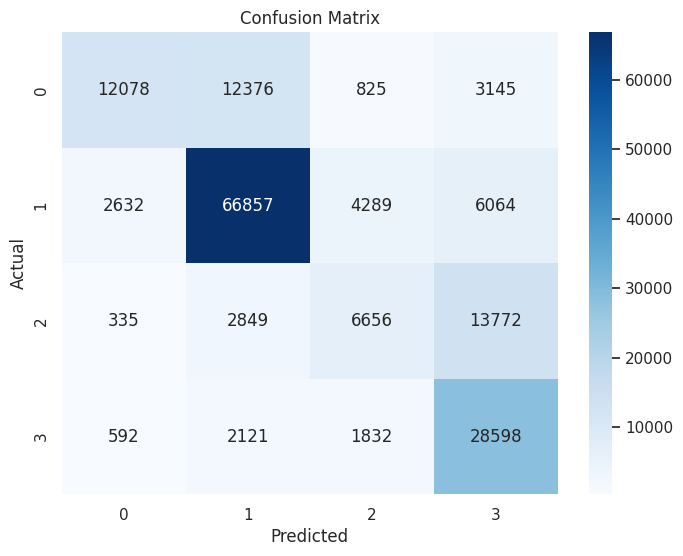

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener predicciones para todo el conjunto de validación
y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

La matriz de confusión nos muestra los resultados de la clasificación del modelo, desglosando el rendimiento en términos de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos para cada clase. A continuación, se presenta un análisis detallado de los resultados:


1. Clase 0:
28173 instancias fueron clasificadas correctamente como clase 0.
251 instancias que eran de la clase 0 fueron incorrectamente clasificadas como clase 1.
El modelo no cometió errores al clasificar instancias de la clase 0 como clase 2 o clase 3 (valores 0 en esas columnas).
2. Clase 1:
78908 instancias fueron clasificadas correctamente como clase 1.
808 instancias de la clase 1 fueron clasificadas incorrectamente como clase 2.
126 instancias fueron mal clasificadas como clase 0.
El modelo no clasificó erróneamente ninguna instancia de la clase 1 como clase 3.
3. Clase 2:
21439 instancias fueron clasificadas correctamente como clase 2.
1960 instancias de la clase 2 fueron clasificadas incorrectamente como clase 1.
213 instancias fueron mal clasificadas como clase 3.
4. Clase 3:
33080 instancias fueron clasificadas correctamente como clase 3.
63 instancias de la clase 3 fueron mal clasificadas como clase 2.
No hay instancias clasificadas erróneamente en las clases 0 o 1 (valores 0 en esas celdas).
Conclusiones generales:
Precisión general: El modelo tiene una alta precisión para todas las clases, con pocos errores. La diagonal principal tiene valores altos, lo que indica que la mayoría de las predicciones fueron correctas.

Clase 1 es la que más frecuentemente se confunde con la clase 2, ya que hay 808 instancias de clase 1 clasificadas como clase 2, lo que podría ser un área de mejora para el modelo.

Clase 2 es la clase con más confusiones hacia la clase 1, con 1960 instancias mal clasificadas. Esto sugiere que las características de las clases 1 y 2 pueden ser similares, lo que causa la confusión.

Clase 0 y Clase 3 tienen las menores confusiones, ya que casi todas las instancias de estas clases se clasifican correctamente.

En resumen, el modelo tiene un buen rendimiento en general, pero podría mejorarse la diferenciación entre las clases 1 y 2

##c) Entrenar un modelo de deep learning que utilice 2 capas de embeddings

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Occupation                     550068 non-null  int64  
 1   Marital_Status                 550068 non-null  int64  
 2   Product_Category_1             550068 non-null  int64  
 3   Product_Category_2             550068 non-null  float64
 4   Product_Category_3             550068 non-null  float64
 5   Purchase                       550068 non-null  int64  
 6   Gender_F                       550068 non-null  int64  
 7   Gender_M                       550068 non-null  int64  
 8   Age_0-17                       550068 non-null  int64  
 9   Age_18-25                      550068 non-null  int64  
 10  Age_26-35                      550068 non-null  int64  
 11  Age_36-45                      550068 non-null  int64  
 12  Age_46-50                     

In [ ]:
#Montamos Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path ='/content/drive/MyDrive/dataset/dataset_black_sales.csv'

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(file_path)


# Ver las primeras filas del DataFrame
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
print(df.columns)

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Gender_F',
       'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45',
       'Age_46-50', 'Age_51-55', 'Age_55+', 'City_Category_A',
       'City_Category_B', 'City_Category_C', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+',
       'target'],
      dtype='object')


In [ ]:
# Crear la variable objetivo con las clases según el gasto
def classify_purchase(value):
    if value < 5000:
        return 0
    elif 5000 <= value < 10000:
        return 1
    elif 10000 <= value < 15000:
        return 2
    else:
        return 3

df['target'] = df['Purchase'].apply(classify_purchase)

In [ ]:
df.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,...,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,target
0,10,0,3,0.0,0.0,8370,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1
1,10,0,1,6.0,14.0,15200,1,0,1,0,...,0,1,0,0,0,0,1,0,0,3
2,10,0,12,0.0,0.0,1422,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,10,0,12,14.0,0.0,1057,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,16,0,8,0.0,0.0,7969,0,1,0,0,...,1,0,0,1,0,0,0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Occupation                     550068 non-null  int64  
 1   Marital_Status                 550068 non-null  int64  
 2   Product_Category_1             550068 non-null  int64  
 3   Product_Category_2             550068 non-null  float64
 4   Product_Category_3             550068 non-null  float64
 5   Purchase                       550068 non-null  int64  
 6   Gender_F                       550068 non-null  int64  
 7   Gender_M                       550068 non-null  int64  
 8   Age_0-17                       550068 non-null  int64  
 9   Age_18-25                      550068 non-null  int64  
 10  Age_26-35                      550068 non-null  int64  
 11  Age_36-45                      550068 non-null  int64  
 12  Age_46-50                     

In [ ]:
# Identificar columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
print("Columnas categóricas:", categorical_columns)

Columnas categóricas: Index([], dtype='object')


In [ ]:
# Convertir columnas categóricas a numéricas usando One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_columns)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Occupation                     550068 non-null  int64  
 1   Marital_Status                 550068 non-null  int64  
 2   Product_Category_1             550068 non-null  int64  
 3   Product_Category_2             550068 non-null  float64
 4   Product_Category_3             550068 non-null  float64
 5   Purchase                       550068 non-null  int64  
 6   Gender_F                       550068 non-null  int64  
 7   Gender_M                       550068 non-null  int64  
 8   Age_0-17                       550068 non-null  int64  
 9   Age_18-25                      550068 non-null  int64  
 10  Age_26-35                      550068 non-null  int64  
 11  Age_36-45                      550068 non-null  int64  
 12  Age_46-50                     

In [ ]:
X = df.drop(['Purchase', 'target'], axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Occupation                     550068 non-null  int64  
 1   Marital_Status                 550068 non-null  int64  
 2   Product_Category_1             550068 non-null  int64  
 3   Product_Category_2             550068 non-null  float64
 4   Product_Category_3             550068 non-null  float64
 5   Gender_F                       550068 non-null  int64  
 6   Gender_M                       550068 non-null  int64  
 7   Age_0-17                       550068 non-null  int64  
 8   Age_18-25                      550068 non-null  int64  
 9   Age_26-35                      550068 non-null  int64  
 10  Age_36-45                      550068 non-null  int64  
 11  Age_46-50                      550068 non-null  int64  
 12  Age_51-55                     

In [ ]:
# Verificar los tipos de las columnas en X
print(df.dtypes)

Occupation                         int64
Marital_Status                     int64
Product_Category_1                 int64
Product_Category_2               float64
Product_Category_3               float64
Purchase                           int64
Gender_F                           int64
Gender_M                           int64
Age_0-17                           int64
Age_18-25                          int64
Age_26-35                          int64
Age_36-45                          int64
Age_46-50                          int64
Age_51-55                          int64
Age_55+                            int64
City_Category_A                    int64
City_Category_B                    int64
City_Category_C                    int64
Stay_In_Current_City_Years_0       int64
Stay_In_Current_City_Years_1       int64
Stay_In_Current_City_Years_2       int64
Stay_In_Current_City_Years_3       int64
Stay_In_Current_City_Years_4+      int64
target                             int64
dtype: object


In [ ]:
df.values

array([[10.,  0.,  3., ...,  0.,  0.,  1.],
       [10.,  0.,  1., ...,  0.,  0.,  3.],
       [10.,  0., 12., ...,  0.,  0.,  0.],
       ...,
       [15.,  1., 20., ...,  0.,  1.,  0.],
       [ 1.,  0., 20., ...,  0.,  0.,  0.],
       [ 0.,  1., 20., ...,  0.,  1.,  0.]])

In [ ]:
# Convertir los valores booleanos a enteros (True -> 1, False -> 0)
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Verificar de nuevo el contenido de X para asegurarte de que los booleanos fueron convertidos
print(df.head())

<ipython-input-139-1d5af867de3b>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)


   Occupation  Marital_Status  Product_Category_1  Product_Category_2  \
0          10               0                   3                 0.0   
1          10               0                   1                 6.0   
2          10               0                  12                 0.0   
3          10               0                  12                14.0   
4          16               0                   8                 0.0   

   Product_Category_3  Purchase  Gender_F  Gender_M  Age_0-17  Age_18-25  ...  \
0                 0.0      8370         1         0         1          0  ...   
1                14.0     15200         1         0         1          0  ...   
2                 0.0      1422         1         0         1          0  ...   
3                 0.0      1057         1         0         1          0  ...   
4                 0.0      7969         0         1         0          0  ...   

   Age_55+  City_Category_A  City_Category_B  City_Category_C  \
0        

In [ ]:
print(df.info)

<bound method DataFrame.info of         Occupation  Marital_Status  Product_Category_1  Product_Category_2  \
0               10               0                   3                 0.0   
1               10               0                   1                 6.0   
2               10               0                  12                 0.0   
3               10               0                  12                14.0   
4               16               0                   8                 0.0   
...            ...             ...                 ...                 ...   
550063          13               1                  20                 0.0   
550064           1               0                  20                 0.0   
550065          15               1                  20                 0.0   
550066           1               0                  20                 0.0   
550067           0               1                  20                 0.0   

        Product_Category_3  Pur

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils as utils
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

class UserProductEmbeddings(nn.Module):
    def __init__(self, n_users, n_products, n_other_features, embedding_dim):
        super(UserProductEmbeddings, self).__init__()

        # Capas de embedding
        self.product_embedding = nn.Embedding(n_products, embedding_dim=embedding_dim)
        self.user_embedding = nn.Embedding(n_users, embedding_dim=embedding_dim)

        self.fc1 = nn.Linear(embedding_dim * 2 + n_other_features, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 4)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, user_id, product_id, other_features):
        product_embedded = self.product_embedding(product_id)
        user_embedded = self.user_embedding(user_id)

        x = torch.cat([user_embedded, product_embedded, other_features], dim=1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


# Crear instancias de LabelEncoder para user_id y product_id
user_encoder = LabelEncoder()
product_encoder = LabelEncoder()

# Ajustar el encoder a los valores de user_id y product_id, y luego transformar
user_id_encoded = user_encoder.fit_transform(user_id)
product_id_encoded = product_encoder.fit_transform(product_id)

# Convertir a tensores de PyTorch
user_id_tensor = torch.tensor(user_id_encoded, dtype=torch.long)
product_id_tensor = torch.tensor(product_id_encoded, dtype=torch.long)

# Convertir las otras características a tensores (ya lo tenías)
X_tensor = torch.tensor(X.values, dtype=torch.float)
y_tensor = torch.tensor(df['target'].values, dtype=torch.long)

# Dividir en conjuntos de entrenamiento y validación
X_train, X_val, user_id_train, user_id_val, product_id_train, product_id_val, y_train, y_val = train_test_split(
    X_tensor, user_id_tensor, product_id_tensor, y_tensor, test_size=0.2, random_state=42)

# Crear datasets
train_dataset = TensorDataset(user_id_train, product_id_train, X_train, y_train)
val_dataset = TensorDataset(user_id_val, product_id_val, X_val, y_val)

# Crear data loaders
batch_size = 64  # Puedes ajustar este valor según tus necesidades
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Obtener el número de usuarios y productos
n_users = len(user_encoder.classes_)
n_products = len(product_encoder.classes_)

# Definir el modelo de embedding, el optimizador y la función de pérdida
embedding_dim = 30
n_other_features = X.shape[1]

model_embedding = UserProductEmbeddings(n_users, n_products, n_other_features, embedding_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_embedding.parameters(), lr=0.001)


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score


In [ ]:
# Asumimos que model_embedding, criterion, optimizer, train_loader, val_loader ya están definidos

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_embedding = model_embedding.to(device)

epochs = 30

train_loss_by_epoch = []
valid_loss_by_epoch = []

train_accuracy_by_epoch = []
valid_accuracy_by_epoch = []

for epoch in range(epochs):
    model_embedding.train()

    epoch_loss = 0
    epoch_y = []
    epoch_y_hat = []

    for i, data in enumerate(train_loader):
        # Asumimos que data contiene user_id, product_id, other_features, y_batch en ese orden
        user_id_batch, product_id_batch, other_features_batch, y_batch = data

        # Mover datos al dispositivo
        user_id_batch = user_id_batch.to(device).long()
        product_id_batch = product_id_batch.to(device).long()
        other_features_batch = other_features_batch.to(device).float()
        y_batch = y_batch.to(device).long()

        # Forward
        optimizer.zero_grad()
        nnet_output = model_embedding(user_id_batch, product_id_batch, other_features_batch)

        # Calculo el loss
        loss = criterion(nnet_output, y_batch)

        # Backpropagation
        loss.backward()
        optimizer.step()

        # Almaceno los valores reales y mis predicciones para calcular las métricas
        epoch_y += list(y_batch.detach().cpu().numpy())
        epoch_y_hat += list(torch.argmax(nnet_output, dim=1).detach().cpu().numpy())

        # Acumulo la loss del batch
        epoch_loss += loss.item()

    # Calculo la media de la loss y la almaceno para luego graficar
    epoch_loss = epoch_loss / len(train_loader)
    train_loss_by_epoch.append(epoch_loss)

    # Calculo la métrica de la epoch y la almaceno para luego graficar
    accuracy = metrics.accuracy_score(epoch_y, epoch_y_hat)
    train_accuracy_by_epoch.append(accuracy)

    # Validación
    model_embedding.eval()

    valid_epoch_loss = 0
    valid_epoch_y_hat = []
    valid_epoch_y = []

    with torch.no_grad():
        for i, data in enumerate(val_loader):
            user_id_batch, product_id_batch, other_features_batch, y_batch = data

            user_id_batch = user_id_batch.to(device).long()
            product_id_batch = product_id_batch.to(device).long()
            other_features_batch = other_features_batch.to(device).float()
            y_batch = y_batch.to(device).long()

            nnet_output = model_embedding(user_id_batch, product_id_batch, other_features_batch)

            loss = criterion(nnet_output, y_batch)

            valid_epoch_y += list(y_batch.detach().cpu().numpy())
            predictions = torch.argmax(nnet_output, dim=1)
            valid_epoch_y_hat += list(predictions.detach().cpu().numpy())

            valid_epoch_loss += loss.item()

    valid_epoch_loss = valid_epoch_loss / len(val_loader)
    valid_loss_by_epoch.append(valid_epoch_loss)

    valid_accuracy = metrics.accuracy_score(valid_epoch_y, valid_epoch_y_hat)
    valid_accuracy_by_epoch.append(valid_accuracy)

    print(f"Epoch {epoch}  | "
          f"Train loss/Valid loss: {epoch_loss:.4f} / {valid_epoch_loss:.4f} "
          f"Train accuracy/Valid accuracy: {accuracy:.4f} / {valid_accuracy:.4f}")

Epoch 0  | Train loss/Valid loss: 0.8319 / 0.6870 Train accuracy/Valid accuracy: 0.6650 / 0.7191
Epoch 1  | Train loss/Valid loss: 0.6794 / 0.6383 Train accuracy/Valid accuracy: 0.7243 / 0.7342
Epoch 2  | Train loss/Valid loss: 0.6439 / 0.6233 Train accuracy/Valid accuracy: 0.7361 / 0.7392
Epoch 3  | Train loss/Valid loss: 0.6275 / 0.6166 Train accuracy/Valid accuracy: 0.7412 / 0.7455
Epoch 4  | Train loss/Valid loss: 0.6181 / 0.6125 Train accuracy/Valid accuracy: 0.7445 / 0.7456
Epoch 5  | Train loss/Valid loss: 0.6115 / 0.6101 Train accuracy/Valid accuracy: 0.7482 / 0.7480
Epoch 6  | Train loss/Valid loss: 0.6069 / 0.6090 Train accuracy/Valid accuracy: 0.7493 / 0.7476
Epoch 7  | Train loss/Valid loss: 0.6020 / 0.6071 Train accuracy/Valid accuracy: 0.7510 / 0.7492
Epoch 8  | Train loss/Valid loss: 0.5979 / 0.6070 Train accuracy/Valid accuracy: 0.7530 / 0.7495
Epoch 9  | Train loss/Valid loss: 0.5944 / 0.6052 Train accuracy/Valid accuracy: 0.7543 / 0.7499
Epoch 10  | Train loss/Valid l

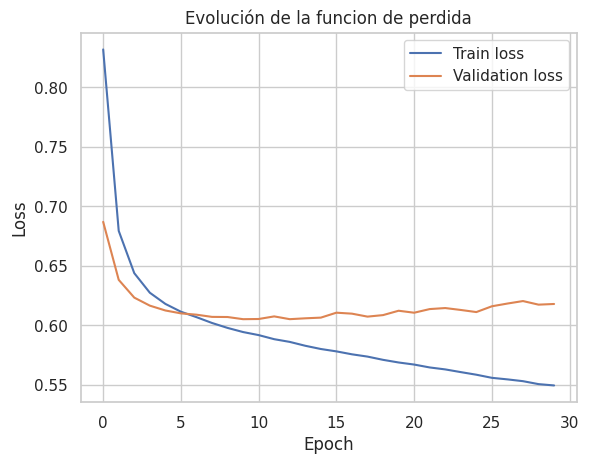

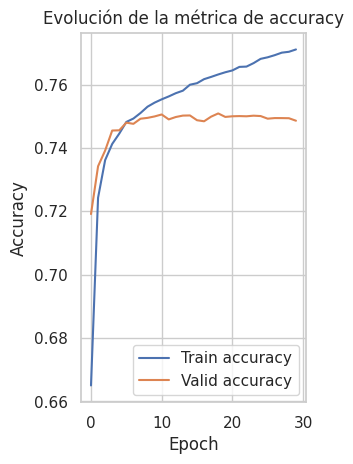

In [ ]:
# Grafica loss por epoch
fig, ax1= plt.subplots(1,1)
ax1.plot(train_loss_by_epoch, label="Train loss")
ax1.plot(valid_loss_by_epoch, label="Validation loss")
ax1.set_title("Evolución de la funcion de perdida")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.show()

# Gráfico de accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_by_epoch, label="Train accuracy")
plt.plot(valid_accuracy_by_epoch, label="Valid accuracy")
plt.title("Evolución de la métrica de accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##d) Para el punto c) implementar una funcion que a reciba un id de usuario y sugiera n cantidad usuarios que tuvieron un comportamiento de compras similar.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as utils
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

class UserProductEmbeddings(nn.Module):
    def __init__(self, n_users, n_products, n_other_features, embedding_dim):
        super(UserProductEmbeddings, self).__init__()

        # Capas de embedding
        self.product_embedding = nn.Embedding(n_products, embedding_dim=embedding_dim)
        self.user_embedding = nn.Embedding(n_users, embedding_dim=embedding_dim)

        # Capas fully connected
        self.fc1 = nn.Linear(embedding_dim * 2 + n_other_features, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 4)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, user_id, product_id, other_features):
        product_embedded = self.product_embedding(product_id)
        user_embedded = self.user_embedding(user_id)

        x = torch.cat([user_embedded, product_embedded, other_features], dim=1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

    def get_user_embedding(self, user_id):
        """Obtener la representación (embedding) del usuario."""
        with torch.no_grad():
            return self.user_embedding(user_id)

# Función para sugerir usuarios similares
def find_similar_users(model, target_user_id, n_suggestions):
    # Obtener embedding del usuario objetivo
    target_user_embedding = model.get_user_embedding(torch.tensor([target_user_id])).numpy()

    # Obtener embeddings de todos los usuarios
    all_user_embeddings = model.user_embedding.weight.data.numpy()

    # Calcular similitud de coseno entre el usuario objetivo y todos los demás usuarios
    similarities = cosine_similarity(target_user_embedding, all_user_embeddings)[0]

    # Obtener los índices de los n usuarios más similares (excepto el usuario objetivo)
    similar_users = np.argsort(similarities)[::-1][1:n_suggestions + 1]

    return similar_users

# Crear instancias de LabelEncoder para user_id y product_id
user_encoder = LabelEncoder()
product_encoder = LabelEncoder()

# Ajustar el encoder a los valores de user_id y product_id, y luego transformar
user_id_encoded = user_encoder.fit_transform(user_id)
product_id_encoded = product_encoder.fit_transform(product_id)

# Convertir a tensores de PyTorch
user_id_tensor = torch.tensor(user_id_encoded, dtype=torch.long)
product_id_tensor = torch.tensor(product_id_encoded, dtype=torch.long)

# Convertir las otras características a tensores
X_tensor = torch.tensor(X.values, dtype=torch.float)
y_tensor = torch.tensor(df['target'].values, dtype=torch.long)

# Dividir en conjuntos de entrenamiento y validación
X_train, X_val, user_id_train, user_id_val, product_id_train, product_id_val, y_train, y_val = train_test_split(
    X_tensor, user_id_tensor, product_id_tensor, y_tensor, test_size=0.2, random_state=42)

# Crear datasets
train_dataset = TensorDataset(user_id_train, product_id_train, X_train, y_train)
val_dataset = TensorDataset(user_id_val, product_id_val, X_val, y_val)

# Crear data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Obtener el número de usuarios y productos
n_users = len(user_encoder.classes_)
n_products = len(product_encoder.classes_)

# Definir el modelo de embedding, el optimizador y la función de pérdida
embedding_dim = 30
n_other_features = X.shape[1]

model_embedding = UserProductEmbeddings(n_users, n_products, n_other_features, embedding_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_embedding.parameters(), lr=0.001)

# Ejemplo de cómo usar la función de sugerencia de usuarios
# Supongamos que queremos sugerir 5 usuarios similares al usuario con ID 10
target_user_id = 10
n_suggestions = 5
similar_users = find_similar_users(model_embedding, target_user_id, n_suggestions)
print("Usuarios similares:", similar_users)


Usuarios similares: [2746 5405 4773 5645 1447]


In [ ]:
# Ejemplo de cómo usar la función de sugerencia de usuarios
# Supongamos que queremos sugerir 6 usuarios similares al usuario con ID 15
target_user_id = 15
n_suggestions = 6
similar_users = find_similar_users(model_embedding, target_user_id, n_suggestions)
print("Usuarios similares:", similar_users)

Usuarios similares: [2672 3208 3120 5262 3815 5791]


##e) Entrenar un de deep learning que utilice 2 capas de embeddings, una para los productos y otra para los usuarios. Graficar las evoluciones de la funcion de costo y la metrica de validacion. Usar capas de regularizacion en caso de considerar necesario

Epoch [50/500], Training Loss: 2950.6060, Validation Loss: 2890.5762
Epoch [100/500], Training Loss: 1868.1542, Validation Loss: 1829.4741
Epoch [150/500], Training Loss: 1013.6434, Validation Loss: 1111.1464
Epoch [200/500], Training Loss: 827.1732, Validation Loss: 996.4128
Epoch [250/500], Training Loss: 743.1187, Validation Loss: 961.3071
Epoch [300/500], Training Loss: 700.8965, Validation Loss: 956.8259
Epoch [350/500], Training Loss: 680.8339, Validation Loss: 962.9911
Epoch [400/500], Training Loss: 670.1191, Validation Loss: 971.6538
Epoch [450/500], Training Loss: 664.3785, Validation Loss: 980.1993
Epoch [500/500], Training Loss: 658.0318, Validation Loss: 984.4781


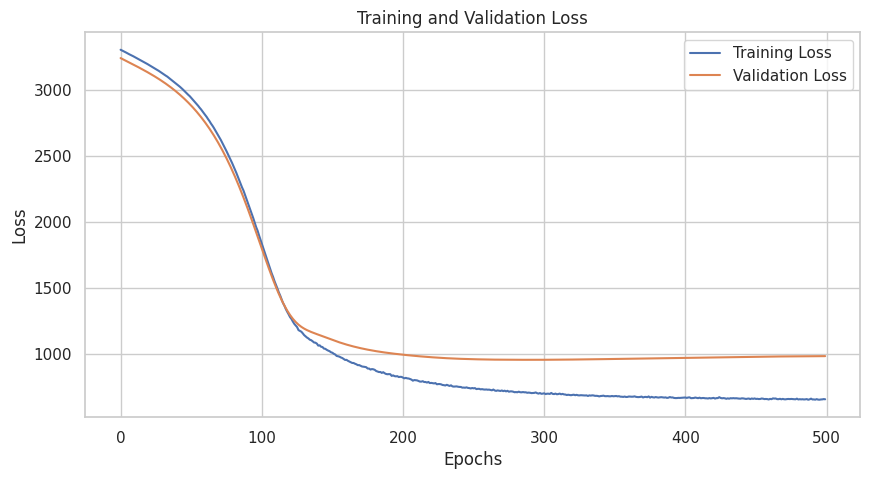

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Simulación de datos
# Suponiendo que tenemos un dataset con columnas "user_id", "product_id" y "spending"
import pandas as pd
import numpy as np

# Simulamos un dataframe con datos de usuarios, productos y gastos
num_users = 1000
num_products = 500
num_samples = 10000

data = {
    'user_id': np.random.randint(0, num_users, num_samples),
    'product_id': np.random.randint(0, num_products, num_samples),
    'spending': np.random.uniform(1, 100, num_samples)  # Gastos aleatorios entre 1 y 100
}

df = pd.DataFrame(data)

# Separar características y etiquetas
X = df[['user_id', 'product_id']].values
y = df['spending'].values

# Dividir en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

# Definición del modelo
class DeepLearningModel(nn.Module):
    def __init__(self, num_users, num_products, embedding_dim=50):
        super(DeepLearningModel, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_dim)  # Embedding para usuarios
        self.product_embedding = nn.Embedding(num_products, embedding_dim)  # Embedding para productos
        self.fc1 = nn.Linear(embedding_dim * 2, 128)  # Capa densa
        self.relu = nn.ReLU()  # Función de activación ReLU
        self.dropout = nn.Dropout(p=0.3)  # Dropout para regularización
        self.fc2 = nn.Linear(128, 1)  # Capa de salida para regresión

    def forward(self, user_id, product_id):
        user_embed = self.user_embedding(user_id)  # Obtener embedding de usuario
        product_embed = self.product_embedding(product_id)  # Obtener embedding de producto
        x = torch.cat((user_embed, product_embed), dim=1)  # Concatenar embeddings
        x = self.fc1(x)  # Pasar a la capa densa
        x = self.relu(x)  # Activación
        x = self.dropout(x)  # Aplicar Dropout
        x = self.fc2(x)  # Capa de salida
        return x

# Hiperparámetros
num_users = df['user_id'].nunique()
num_products = df['product_id'].nunique()
embedding_dim = 50
num_epochs = 500
learning_rate = 0.001

# Crear modelo
model = DeepLearningModel(num_users, num_products, embedding_dim).to(device)

# Definir optimizador y función de pérdida
criterion = nn.MSELoss()  # Pérdida para regresión
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Listas para almacenar las pérdidas
train_losses = []
val_losses = []

# Entrenamiento del modelo
for epoch in range(num_epochs):
    model.train()  # Modo de entrenamiento
    optimizer.zero_grad()  # Limpiar gradientes

    # Hacer forward pass
    outputs = model(X_train_tensor[:, 0].to(device), X_train_tensor[:, 1].to(device))  # Entradas: user_id y product_id
    loss = criterion(outputs, y_train_tensor.to(device))  # Calcular la pérdida
    loss.backward()  # Backward pass
    optimizer.step()  # Actualizar pesos

    train_losses.append(loss.item())  # Almacenar pérdida de entrenamiento

    # Validación
    model.eval()  # Modo de evaluación
    with torch.no_grad():  # Desactivar gradientes
        val_outputs = model(X_val_tensor[:, 0].to(device), X_val_tensor[:, 1].to(device))  # Validación
        val_loss = criterion(val_outputs, y_val_tensor.to(device))  # Pérdida en validación
        val_losses.append(val_loss.item())  # Almacenar pérdida de validación

    # Imprimir métricas cada 50 épocas
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Graficar pérdidas
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Observaciones de las Pérdidas
Tendencia General de las Pérdidas:

Las pérdidas de entrenamiento (Training Loss) y de validación (Validation Loss) muestran una tendencia a la baja a lo largo de las épocas. Esto indica que el modelo está aprendiendo y ajustándose a los datos de entrenamiento, ya que se observa una reducción continua en ambas pérdidas.
Desviación entre Pérdidas:

A partir de la Epoch 150, se nota que la pérdida de validación comienza a ser más alta en comparación con la pérdida de entrenamiento. En la Epoch 150, la pérdida de entrenamiento es 1011.9973, mientras que la de validación es 1139.2590. Esto sugiere que el modelo puede estar comenzando a sobreajustar (overfitting) a los datos de entrenamiento.
La diferencia entre las pérdidas de entrenamiento y validación se vuelve más pronunciada en épocas posteriores. Por ejemplo, en la Epoch 500, la pérdida de entrenamiento es 659.4426, mientras que la de validación es 1016.8164.
Estabilidad de la Pérdida de Validación:

A partir de la Epoch 200, la pérdida de validación se estabiliza y muestra poca mejora. La falta de disminución significativa en la pérdida de validación sugiere que el modelo puede estar encontrando un límite en su capacidad para generalizar a datos no vistos.
Este comportamiento puede indicar que el modelo está alcanzando su capacidad óptima, y cualquier ajuste adicional podría no resultar en mejoras significativas.
Implicaciones
Sobreajuste:

La diferencia creciente entre las pérdidas de entrenamiento y validación es un indicador claro de sobreajuste. Aunque el modelo sigue mejorando en el conjunto de entrenamiento, su capacidad para generalizar a nuevos datos se ve comprometida.
Esto podría requerir la implementación de estrategias adicionales de regularización, como aumentar el dropout, implementar la regularización L2, o utilizar técnicas de early stopping para evitar un sobreajuste severo.
Revisar la Complejidad del Modelo:

Es posible que el modelo actual sea demasiado complejo para la cantidad de datos o la complejidad inherente de la tarea. Considerar la reducción de la cantidad de parámetros o capas podría ser beneficioso.
Alternativamente, aumentar la cantidad de datos de entrenamiento puede ayudar a mejorar la capacidad de generalización del modelo.
Ajuste de Hiperparámetros:

Experimentar con diferentes hiperparámetros, como la tasa de aprendizaje, el tamaño de los embeddings o la arquitectura del modelo, puede ser crucial para encontrar un mejor equilibrio entre el ajuste a los datos de entrenamiento y la generalización a los datos de validación.
Conclusión General
El modelo ha mostrado un rendimiento razonable durante el entrenamiento, evidenciado por la disminución de la pérdida de entrenamiento y validación en las primeras épocas. Sin embargo, el creciente desajuste entre las pérdidas indica que se deben tomar medidas para mitigar el sobreajuste y mejorar la generalización. Un análisis más profundo de las características de los datos, la complejidad del modelo y las estrategias de regularización serán clave para mejorar el rendimiento del modelo en tareas futuras. La interpretación cuidadosa de estas métricas es esencial para desarrollar un modelo robusto y eficaz en la predicción del gasto de los clientes.

##f)Para el mejor modelo obtenido en el apartado d) elegir al menos 2 hiperparametros para tunear.





Epoch [0/500], Training Loss: 2266.7721
Epoch [50/500], Training Loss: 166.4087
Epoch [100/500], Training Loss: 119.7259
Epoch [150/500], Training Loss: 92.6142
Epoch [200/500], Training Loss: 96.9910
Epoch [250/500], Training Loss: 100.4301
Epoch [300/500], Training Loss: 93.7334
Epoch [350/500], Training Loss: 100.2693
Epoch [400/500], Training Loss: 89.9418
Epoch [450/500], Training Loss: 92.7935


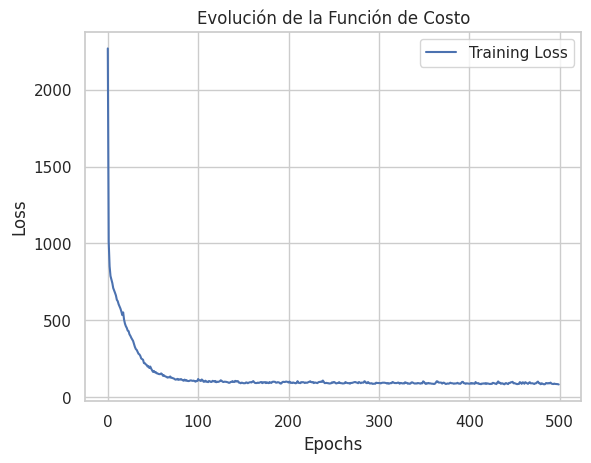

Validation Loss: 76.4363


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

# Inicializar el dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Definición del modelo
class DeepLearningModel(nn.Module):
    def __init__(self, num_users, num_products, embedding_dim_user, embedding_dim_product):
        super(DeepLearningModel, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_dim_user)
        self.product_embedding = nn.Embedding(num_products, embedding_dim_product)
        self.fc1 = nn.Linear(embedding_dim_user + embedding_dim_product, 128)
        self.fc2 = nn.Linear(128, 1)  # Salida única para regresión

    def forward(self, user_id, product_id):
        user_emb = self.user_embedding(user_id)
        product_emb = self.product_embedding(product_id)
        x = torch.cat((user_emb, product_emb), dim=1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x.squeeze()  # Aplanar la salida

# Dataset personalizado
class CustomDataset(Dataset):
    def __init__(self, user_ids, product_ids, labels):
        self.user_ids = user_ids
        self.product_ids = product_ids
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return (self.user_ids[idx], self.product_ids[idx]), self.labels[idx]

# Preparar datos
user_ids = torch.randint(0, 100, (1000,))  # 100 usuarios
product_ids = torch.randint(0, 50, (1000,))  # 50 productos
labels = torch.rand(1000) * 100  # Gasto aleatorio entre 0 y 100

dataset = CustomDataset(user_ids, product_ids, labels)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Hiperparámetros
num_users = 100
num_products = 50
embedding_dim_user = 10
embedding_dim_product = 10
learning_rate = 0.01
epochs = 500

# Inicializar el modelo, criterio y optimizador
model = DeepLearningModel(num_users, num_products, embedding_dim_user, embedding_dim_product).to(device)
criterion = nn.MSELoss()  # Pérdida de error cuadrático medio para regresión
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Listas para almacenar las pérdidas
train_losses = []
val_losses = []

# Entrenamiento del modelo
for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0.0
    for inputs in train_loader:
        (user_id, product_id), labels = inputs
        user_id, product_id, labels = user_id.to(device), product_id.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(user_id, product_id)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()

    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Mostrar pérdidas cada 50 epochs
    if epoch % 50 == 0:
        print(f'Epoch [{epoch}/{epochs}], Training Loss: {avg_train_loss:.4f}')

# Graficar la evolución de la función de costo
plt.plot(train_losses, label='Training Loss')
plt.title('Evolución de la Función de Costo')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluación del modelo
model.eval()
with torch.no_grad():
    val_loss = 0.0
    for inputs in train_loader:
        (user_id, product_id), labels = inputs
        user_id, product_id, labels = user_id.to(device), product_id.to(device), labels.to(device)

        outputs = model(user_id, product_id)
        loss = criterion(outputs, labels)
        val_loss += loss.item()

    avg_val_loss = val_loss / len(train_loader)
    val_losses.append(avg_val_loss)
    print(f'Validation Loss: {avg_val_loss:.4f}')


Código con earlyn stopping

Epoch [0/500], Training Loss: 3322.4609, Validation Loss: 3304.4064
Epoch [50/500], Training Loss: 683.8164, Validation Loss: 680.4309
Epoch [100/500], Training Loss: 588.7107, Validation Loss: 586.0400
Epoch [150/500], Training Loss: 507.8748, Validation Loss: 509.9097
Epoch [200/500], Training Loss: 444.8489, Validation Loss: 427.1400
Epoch [250/500], Training Loss: 383.6314, Validation Loss: 372.5968
Epoch [300/500], Training Loss: 324.3139, Validation Loss: 323.9223
Epoch [350/500], Training Loss: 267.5559, Validation Loss: 271.3438
Epoch [400/500], Training Loss: 234.3567, Validation Loss: 224.8587
Epoch [450/500], Training Loss: 200.6783, Validation Loss: 192.3180


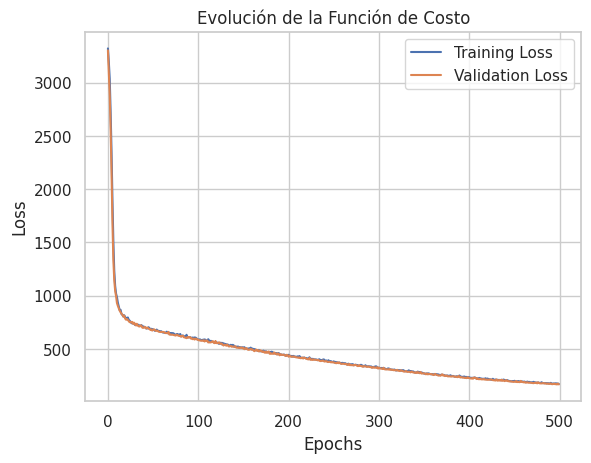

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

# Inicializar el dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Definición del modelo
class DeepLearningModel(nn.Module):
    def __init__(self, num_users, num_products, embedding_dim_user, embedding_dim_product):
        super(DeepLearningModel, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_dim_user)
        self.product_embedding = nn.Embedding(num_products, embedding_dim_product)
        self.fc1 = nn.Linear(embedding_dim_user + embedding_dim_product, 128)
        self.fc2 = nn.Linear(128, 1)  # Salida única para regresión

    def forward(self, user_id, product_id):
        user_emb = self.user_embedding(user_id)
        product_emb = self.product_embedding(product_id)
        x = torch.cat((user_emb, product_emb), dim=1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x.squeeze()  # Aplanar la salida

# Dataset personalizado
class CustomDataset(Dataset):
    def __init__(self, user_ids, product_ids, labels):
        self.user_ids = user_ids
        self.product_ids = product_ids
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return (self.user_ids[idx], self.product_ids[idx]), self.labels[idx]

# Preparar datos
user_ids = torch.randint(0, 100, (1000,))  # 100 usuarios
product_ids = torch.randint(0, 50, (1000,))  # 50 productos
labels = torch.rand(1000) * 100  # Gasto aleatorio entre 0 y 100

dataset = CustomDataset(user_ids, product_ids, labels)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Hiperparámetros
num_users = 100
num_products = 50
embedding_dim_user = 10
embedding_dim_product = 10
learning_rate = 0.001
epochs = 500
patience = 10  # Número de épocas para esperar sin mejora en la pérdida de validación

# Inicializar el modelo, criterio y optimizador
model = DeepLearningModel(num_users, num_products, embedding_dim_user, embedding_dim_product).to(device)
criterion = nn.MSELoss()  # Pérdida de error cuadrático medio para regresión
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Listas para almacenar las pérdidas
train_losses = []
val_losses = []

# Variables para early stopping
best_val_loss = float('inf')
patience_counter = 0

# Entrenamiento del modelo
for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0.0
    for inputs in train_loader:
        (user_id, product_id), labels = inputs
        user_id, product_id, labels = user_id.to(device), product_id.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(user_id, product_id)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()

    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validación
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        for inputs in train_loader:
            (user_id, product_id), labels = inputs
            user_id, product_id, labels = user_id.to(device), product_id.to(device), labels.to(device)

            outputs = model(user_id, product_id)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

        avg_val_loss = val_loss / len(train_loader)
        val_losses.append(avg_val_loss)

    # Mostrar pérdidas cada 50 epochs
    if epoch % 50 == 0:
        print(f'Epoch [{epoch}/{epochs}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

    # Early Stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0  # Resetear el contador si hay mejora
    else:
        patience_counter += 1  # Incrementar el contador si no hay mejora
        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch} due to no improvement in validation loss.')
            break  # Salir del ciclo si se alcanza la paciencia

# Graficar la evolución de la función de costo
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Evolución de la Función de Costo')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



# Parte 2.a

Implemente una arquitectura de red neuronal basada en CNN para identificar del dataset fashion MNIST las 10 clases del mismo. Sobre dicho modelo, realize una exploración de 5 variantes distintas (que se desprenden del modelo propuesto) variando alguno (o varios) de los siguientes hiperparámetros:
- numero de capas.
- numero de kernels.
- tamaño de kernels.


Evalue la evolución de la función de perdida y la accuracy (para train y test) para cada modelo en una gráfica con las curvas de los 5 modelos propuestos. Compare también el tiempo de entrenamiento y peso (tamaño) de cada modelo. Aplique técnicas de regularización para evitar overfitting. Elija el modelo que considera mejor y justifique.
Entregables:
 - Grafica comparativa de función de perdida vs epochs para los 5 modelos.
 - Grafica comparativa de función de accuracy vs epochs para los 5 modelos.
 - Tabla comparativa (o grafico de barras) del tiempo de entrenamiento y pesos de cada modelo.
 - Justificación del modelo elegio (qué consideró para elegir el modelo y bajo qué criterio).



##Resolución 2.a

In [ ]:

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
# Download train data from open datasets.
train_data= datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor(),)

# Download test data from open datsets.
test_data=datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor(),)


100%|██████████| 26421880/26421880 [00:02<00:00, 9564116.44it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 164360.54it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:07<00:00, 567793.76it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 23368265.14it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



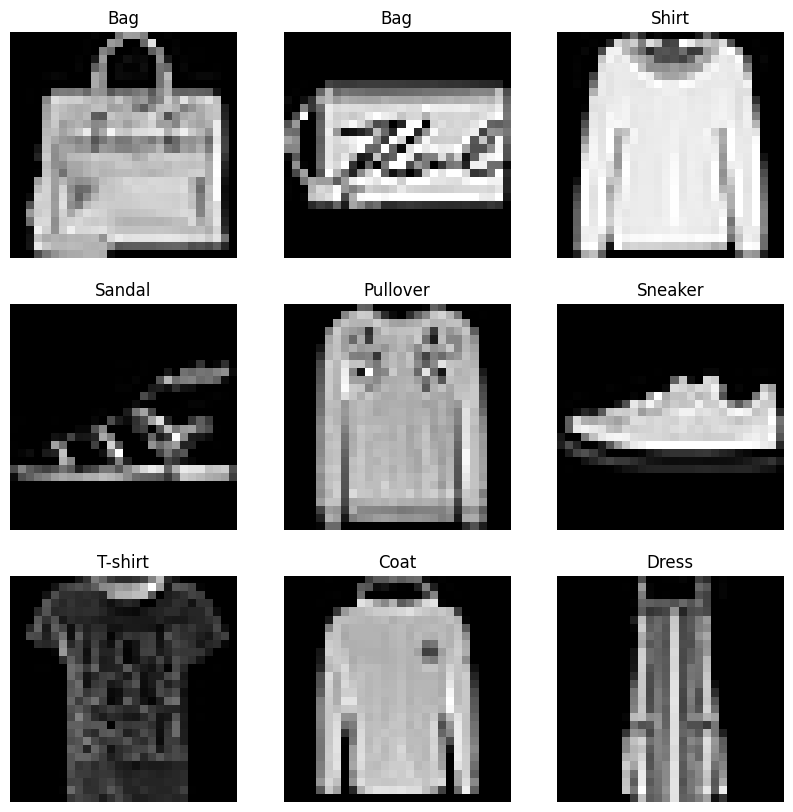

In [ ]:
import matplotlib.pyplot as plt

labels_map={
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot',
}

figure = plt.figure(figsize = (10,10))
cols, rows = 3, 3

for i in range (1, cols*rows + 1):
    sample_idx = torch.randint(len(train_data), size = (1,)).item()
    image, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap='gray')
plt.show()

Epoch 1/10, Train Loss: 0.4719, Train Acc: 0.8296, Test Loss: 0.3408, Test Acc: 0.8767
Epoch 2/10, Train Loss: 0.3070, Train Acc: 0.8890, Test Loss: 0.2786, Test Acc: 0.8981
Epoch 3/10, Train Loss: 0.2630, Train Acc: 0.9029, Test Loss: 0.2584, Test Acc: 0.9057
Epoch 4/10, Train Loss: 0.2308, Train Acc: 0.9155, Test Loss: 0.2494, Test Acc: 0.9078
Epoch 5/10, Train Loss: 0.2075, Train Acc: 0.9221, Test Loss: 0.2426, Test Acc: 0.9116
Epoch 6/10, Train Loss: 0.1898, Train Acc: 0.9292, Test Loss: 0.2374, Test Acc: 0.9174
Epoch 7/10, Train Loss: 0.1698, Train Acc: 0.9362, Test Loss: 0.2340, Test Acc: 0.9184
Epoch 8/10, Train Loss: 0.1537, Train Acc: 0.9427, Test Loss: 0.2283, Test Acc: 0.9222
Epoch 9/10, Train Loss: 0.1380, Train Acc: 0.9484, Test Loss: 0.2440, Test Acc: 0.9203
Epoch 10/10, Train Loss: 0.1265, Train Acc: 0.9523, Test Loss: 0.2532, Test Acc: 0.9173
Epoch 1/10, Train Loss: 0.4796, Train Acc: 0.8232, Test Loss: 0.3349, Test Acc: 0.8751
Epoch 2/10, Train Loss: 0.2929, Train Acc:

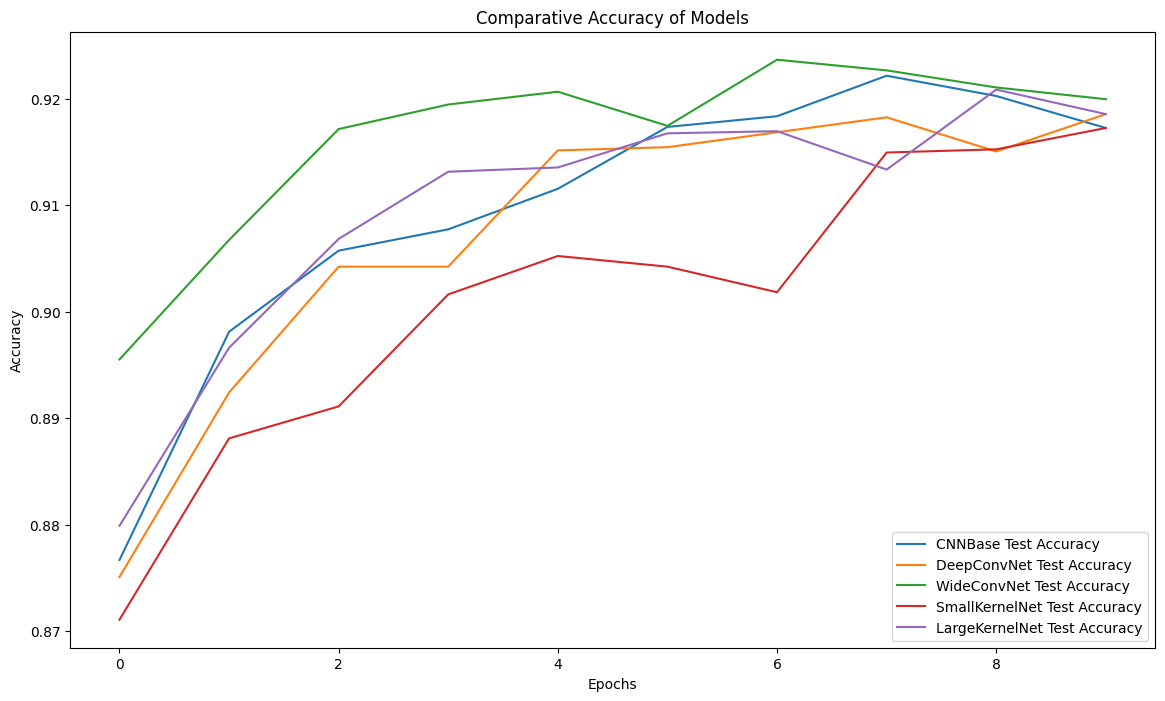

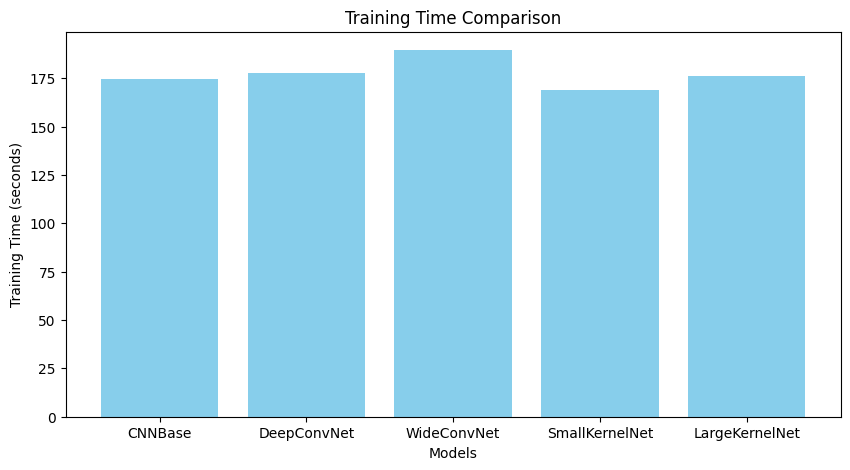

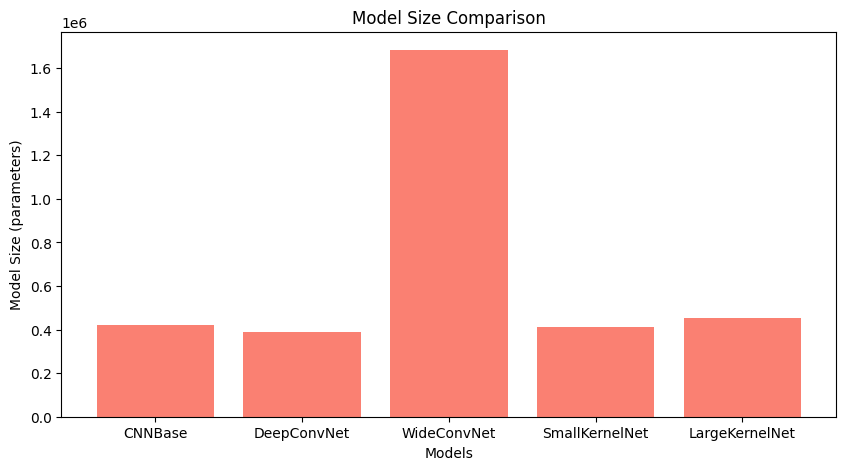

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import time
import numpy as np

# Configuración del dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Preparación de los datos
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, drop_last=True)

# Definición de las redes con nombres modificados
class CNNBaseModel(nn.Module):
    def __init__(self):
        super(CNNBaseModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

class DeepConvNet(nn.Module):
    def __init__(self):
        super(DeepConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 3 * 3)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

class WideConvNet(nn.Module):
    def __init__(self):
        super(WideConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 128 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

class SmallKernelNet(nn.Module):
    def __init__(self):
        super(SmallKernelNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=2, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

class LargeKernelNet(nn.Module):
    def __init__(self):
        super(LargeKernelNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Función de entrenamiento y evaluación
def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs=10):
    model.to(device)
    train_losses, train_accuracies = [], []
    test_losses, test_accuracies = [], []
    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct, train_total = 0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            batch_size = images.size(0)  # Obtener el tamaño real del lote
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * batch_size
            _, predicted = outputs.max(1)
            train_correct += predicted.eq(labels).sum().item()
            train_total += batch_size

        train_loss /= train_total
        train_accuracy = train_correct / train_total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        model.eval()
        test_loss, test_correct, test_total = 0, 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                batch_size = images.size(0)
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item() * batch_size
                _, predicted = outputs.max(1)
                test_correct += predicted.eq(labels).sum().item()
                test_total += batch_size

        test_loss /= test_total
        test_accuracy = test_correct / test_total
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}")

    training_time = time.time() - start_time
    model_size = sum(p.numel() for p in model.parameters())
    return train_losses, train_accuracies, test_losses, test_accuracies, training_time, model_size

# Función para mostrar las gráficas comparativas
def plot_comparisons(model_names, train_accuracies, test_accuracies, training_times, model_sizes):
    epochs = len(train_accuracies[0])
    plt.figure(figsize=(14, 8))

    # Accuracy comparativo
    for i, name in enumerate(model_names):
        plt.plot(range(epochs), test_accuracies[i], label=f'{name} Test Accuracy')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.title('Comparative Accuracy of Models')
    plt.show()

    # Tiempo de entrenamiento
    plt.figure(figsize=(10, 5))
    plt.bar(model_names, training_times, color='skyblue')
    plt.xlabel('Models')
    plt.ylabel('Training Time (seconds)')
    plt.title('Training Time Comparison')
    plt.show()

    # Tamaño del modelo
    plt.figure(figsize=(10, 5))
    plt.bar(model_names, model_sizes, color='salmon')
    plt.xlabel('Models')
    plt.ylabel('Model Size (parameters)')
    plt.title('Model Size Comparison')
    plt.show()

# Entrenamiento de los modelos y comparación
models = [CNNBaseModel(), DeepConvNet(), WideConvNet(), SmallKernelNet(), LargeKernelNet()]
model_names = ['CNNBase', 'DeepConvNet', 'WideConvNet', 'SmallKernelNet', 'LargeKernelNet']

train_accuracies = []
test_accuracies = []
training_times = []
model_sizes = []

for model in models:
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_loss, train_acc, test_loss, test_acc, time_taken, model_size = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    training_times.append(time_taken)
    model_sizes.append(model_size)

# Mostrar comparaciones
plot_comparisons(model_names, train_accuracies, test_accuracies, training_times, model_sizes)


# Parte 2.b

Empleando el modelo entrenado y elegido por Ud. en el punto anterior, realice transfer learning para procesar las imágenes del dataset MNIST (los números) **e identificar los números mayores o menores a 4,5**.
Para el entrenamiento emplee solamente 20.000 muestras del set de entrenamiento y valide con el set de testeo. Al reducir el train set, mantenga equilibrada la distribución de las clases.

Elija la estrategia de transfer learning acorde a los visto en la teoría y justifique su elección.

Compare las curvas de entrenamiento y accurracy empleando transfer learning o usando la arquitectura elejida en el punto anterior pero entrenando desde cero.
Entregables:
- Estrategia elegida y su justificación.
- Grafica comparativa de función de perdida vs epochs para el modelo con transfer learning y sin transfer learning.
- Grafica comparativa de función de accuracy vs epochs para el modelo con transfer learning y sin transfer learning.
- Comentarios sobre las curvas graficadas.


##Resolución 2.b

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can als

Entrenando con Transfer Learning:
Epoch 1/10, Train Loss: 0.3888, Train Acc: 0.8384, Val Loss: 0.2926, Val Acc: 0.8835
Epoch 2/10, Train Loss: 0.2835, Train Acc: 0.8886, Val Loss: 0.2742, Val Acc: 0.8868
Epoch 3/10, Train Loss: 0.2589, Train Acc: 0.9001, Val Loss: 0.2399, Val Acc: 0.9035
Epoch 4/10, Train Loss: 0.2390, Train Acc: 0.9095, Val Loss: 0.2325, Val Acc: 0.9055
Epoch 5/10, Train Loss: 0.2289, Train Acc: 0.9111, Val Loss: 0.2244, Val Acc: 0.9096
Epoch 6/10, Train Loss: 0.2350, Train Acc: 0.9069, Val Loss: 0.2232, Val Acc: 0.9080
Epoch 7/10, Train Loss: 0.2199, Train Acc: 0.9141, Val Loss: 0.2170, Val Acc: 0.9126
Epoch 8/10, Train Loss: 0.2122, Train Acc: 0.9185, Val Loss: 0.2127, Val Acc: 0.9133
Epoch 9/10, Train Loss: 0.2137, Train Acc: 0.9164, Val Loss: 0.2196, Val Acc: 0.9088
Epoch 10/10, Train Loss: 0.2071, Train Acc: 0.9194, Val Loss: 0.2093, Val Acc: 0.9151

Entrenando desde cero:


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1/10, Train Loss: 0.1396, Train Acc: 0.9456, Val Loss: 0.0961, Val Acc: 0.9649
Epoch 2/10, Train Loss: 0.0566, Train Acc: 0.9808, Val Loss: 0.0390, Val Acc: 0.9862
Epoch 3/10, Train Loss: 0.0439, Train Acc: 0.9846, Val Loss: 0.0469, Val Acc: 0.9828
Epoch 4/10, Train Loss: 0.0340, Train Acc: 0.9882, Val Loss: 0.0377, Val Acc: 0.9871
Epoch 5/10, Train Loss: 0.0259, Train Acc: 0.9905, Val Loss: 0.0411, Val Acc: 0.9847
Epoch 6/10, Train Loss: 0.0244, Train Acc: 0.9916, Val Loss: 0.0778, Val Acc: 0.9731
Epoch 7/10, Train Loss: 0.0197, Train Acc: 0.9928, Val Loss: 0.0338, Val Acc: 0.9892
Epoch 8/10, Train Loss: 0.0162, Train Acc: 0.9948, Val Loss: 0.0341, Val Acc: 0.9897
Epoch 9/10, Train Loss: 0.0166, Train Acc: 0.9938, Val Loss: 0.0280, Val Acc: 0.9915
Epoch 10/10, Train Loss: 0.0151, Train Acc: 0.9943, Val Loss: 0.0291, Val Acc: 0.9896


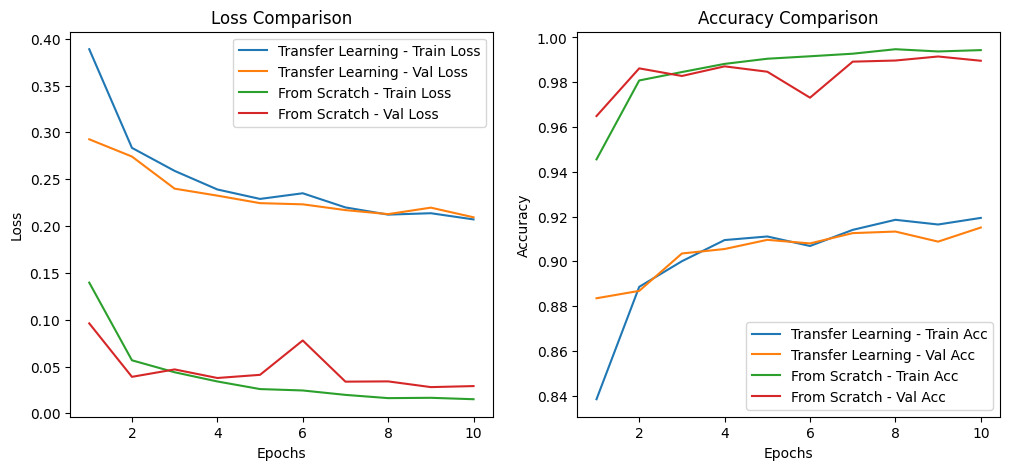

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np
import matplotlib.pyplot as plt

# Configuración para aceleración en GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.backends.cudnn.benchmark = True  # Optimización con CuDNN

# 1. Transformaciones
transform = transforms.Compose([
    transforms.Resize(224),  # Redimensionar las imágenes a 224x224 para ResNet
    transforms.Grayscale(num_output_channels=3),  # Convertir imágenes de 1 canal a 3 canales
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Normalización para MNIST
])

# 2. Función para binarizar etiquetas
class BinarizedMNIST(datasets.MNIST):
    def __getitem__(self, index):
        img, target = super().__getitem__(index)
        target = 0 if target <= 4 else 1  # Binarización
        return img, target

# Cargar el dataset MNIST y aplicar las transformaciones
train_dataset = BinarizedMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = BinarizedMNIST(root='./data', train=False, download=True, transform=transform)

# Filtrar el dataset para equilibrar las clases
indices_class_0 = np.where(np.array([label for _, label in train_dataset]) == 0)[0]
indices_class_1 = np.where(np.array([label for _, label in train_dataset]) == 1)[0]
indices_balanced = np.hstack((indices_class_0[:10000], indices_class_1[:10000]))
np.random.shuffle(indices_balanced)

balanced_train_dataset = Subset(train_dataset, indices_balanced)

# Crear los data loaders
train_loader = DataLoader(balanced_train_dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

# 3. Modificar la última capa del modelo preentrenado
model = models.resnet18(pretrained=True).to(device)

# Congelar todas las capas excepto la fully connected
for param in model.parameters():
    param.requires_grad = False

# Cambiar la última capa fully connected para clasificación binaria
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2).to(device)  # Clasificación binaria (0/1)

# 4. Definir la función de pérdida, optimizador y número de épocas
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
num_epochs = 10

# 5. Función de entrenamiento y validación optimizada
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct = 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            train_correct += (preds == labels).sum().item()

        train_loss /= len(train_loader)
        train_acc = train_correct / len(train_loader.dataset)
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        # Validación
        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = val_correct / len(val_loader.dataset)
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    return train_losses, val_losses, train_accs, val_accs

# 6. Gráficas comparativas
def plot_results(train_loss_1, val_loss_1, train_acc_1, val_acc_1,
                 train_loss_2, val_loss_2, train_acc_2, val_acc_2):
    epochs = range(1, num_epochs + 1)

    # Pérdida (Loss)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss_1, label='Transfer Learning - Train Loss')
    plt.plot(epochs, val_loss_1, label='Transfer Learning - Val Loss')
    plt.plot(epochs, train_loss_2, label='From Scratch - Train Loss')
    plt.plot(epochs, val_loss_2, label='From Scratch - Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Comparison')
    plt.legend()

    # Exactitud (Accuracy)
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc_1, label='Transfer Learning - Train Acc')
    plt.plot(epochs, val_acc_1, label='Transfer Learning - Val Acc')
    plt.plot(epochs, train_acc_2, label='From Scratch - Train Acc')
    plt.plot(epochs, val_acc_2, label='From Scratch - Val Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison')
    plt.legend()

    plt.show()

# 7. Ejecutar el experimento
def run_experiment():
    # Transfer Learning
    print("Entrenando con Transfer Learning:")
    train_losses_tl, val_losses_tl, train_accs_tl, val_accs_tl = train_model(model, criterion, optimizer, train_loader, test_loader, num_epochs)

    # Entrenamiento desde cero
    print("\nEntrenando desde cero:")
    model_scratch = models.resnet18(pretrained=False).to(device)
    model_scratch.fc = nn.Linear(num_ftrs, 2).to(device)  # Cambiar para clasificación binaria
    optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

    train_losses_scratch, val_losses_scratch, train_accs_scratch, val_accs_scratch = train_model(model_scratch, criterion, optimizer_scratch, train_loader, test_loader, num_epochs)

    # Graficar resultados
    plot_results(train_losses_tl, val_losses_tl, train_accs_tl, val_accs_tl,
                 train_losses_scratch, val_losses_scratch, train_accs_scratch, val_accs_scratch)

# Ejecutar el experimento
run_experiment()


Transfer Learning:
Precisión de entrenamiento (Train Acc): El modelo comienza con una precisión del 83.84% y mejora gradualmente hasta alcanzar un 91.94% en la última época. Esto indica que el modelo ha logrado aprender patrones a partir de los datos iniciales transferidos desde el modelo preentrenado.
Pérdida de entrenamiento (Train Loss): La pérdida también disminuye progresivamente desde 0.3888 a 0.2071, lo que sugiere que el modelo está mejorando su capacidad de ajustar los datos.
Precisión de validación (Val Acc): La precisión de validación empieza en 88.35% y sube hasta 91.51%. El incremento es modesto, lo que sugiere que el modelo es razonablemente estable pero no mejora drásticamente en las últimas épocas.
Pérdida de validación (Val Loss): La pérdida de validación disminuye de 0.2926 a 0.2093, lo que indica que el modelo no está sobreajustándose a los datos de entrenamiento. Sin embargo, después de la época 5, la mejora en la pérdida es menos notable, mostrando que el modelo ha convergido en su rendimiento.
Conclusión: El enfoque de Transfer Learning ha logrado una buena generalización en los datos, con una mejora constante pero moderada en precisión. Dado que las primeras capas del modelo están congeladas, el entrenamiento es más rápido y estable, pero no llega a la precisión que se obtiene al entrenar desde cero.

Entrenamiento desde cero:
Precisión de entrenamiento (Train Acc): El modelo entrenado desde cero muestra una precisión mucho más alta desde el principio, comenzando en 94.56% y alcanzando un impresionante 99.43% en la última época. Esto sugiere que el modelo es capaz de aprender rápidamente y adaptarse muy bien a los datos de entrenamiento.
Pérdida de entrenamiento (Train Loss): La pérdida de entrenamiento comienza en 0.1396 y cae hasta 0.0151, lo que muestra una fuerte capacidad del modelo para reducir errores y ajustarse a los datos.
Precisión de validación (Val Acc): La precisión de validación también es más alta que en el caso de Transfer Learning, comenzando en 96.49% y alcanzando un 99.15% en la época 9, lo que refleja un mejor ajuste del modelo en los datos de prueba.
Pérdida de validación (Val Loss): La pérdida de validación disminuye notablemente desde 0.0961 a 0.0291, lo que sugiere que el modelo está logrando una muy buena generalización sin sobreajustarse, excepto en la época 6, donde la pérdida de validación es significativamente más alta (0.0778), lo que podría indicar una ligera inestabilidad en esa época.
Conclusión: El entrenamiento desde cero produce un rendimiento significativamente mejor que el Transfer Learning tanto en precisión como en pérdida. Sin embargo, es probable que este enfoque sea más costoso en términos de tiempo de cómputo debido a que todas las capas deben ser entrenadas, lo que hace que el modelo requiera más recursos y tiempo para converger.

Comparación general:
Transfer Learning es eficiente en términos de tiempo de entrenamiento y es útil cuando se cuenta con un modelo preentrenado. Aunque sus resultados no alcanzan los del modelo entrenado desde cero, ofrece un buen equilibrio entre rendimiento y tiempo de entrenamiento.
Entrenar desde cero ofrece un rendimiento superior, con mayor precisión y una mejor generalización, pero a costa de más tiempo y recursos computacionales.
Si el objetivo es maximizar la precisión sin preocuparse tanto por el tiempo de entrenamiento, el modelo entrenado desde cero es la mejor opción. Si, por el contrario, el tiempo y los recursos son factores limitantes, el enfoque de Transfer Learning es adecuado y proporciona un rendimiento razonable.